# Introduction

Language identification is the task of automatically determining the language of a given text, essential for applications like machine translation, multilingual document tracking, and enhancing user experiences on electronic devices. This project focuses on developing a model to accurately identify languages, leveraging advanced algorithms and diverse datasets to handle the challenges posed by short texts and similar linguistic patterns.

# LIBRARY REQUIRED:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data collection:

## Dataset Description

The dataset used for this project is in a CSV format with two primary columns:

* Text: This column contains the input text samples, which can vary in length from single words to complete sentences. The text spans multiple languages, offering a diverse range of linguistic structures and features.

* Language: This column indicates the language label for the corresponding text. Each label represents a unique language, ensuring a supervised learning approach for training the model.

In [5]:
df = pd.read_csv("/content/drive/MyDrive/LingualSense_dataset[1].csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32336 entries, 0 to 32335
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32336 non-null  object
 1   Language  32336 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


# data info:

In [6]:
print("\nFirst Few Rows:")
print(df.head(10))


First Few Rows:
                                                Text  Language
0  Klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...  Japanese
6  tsutinalar i̇ngilizce tsuutina kanadada albert...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...  Japanese


In [7]:
df.describe()

Text Language
count                                               32336    32336
unique                                              32116       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385

# Check for Missing Values

In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Text        0
Language    0
dtype: int64


In [9]:
 # Handle Missing Values
df['Text'] = df['Text'].fillna("Unknown")
df = df.dropna(subset=['Language'])

# Duplicate in dataset

## Checking for Duplicate

In [10]:
print("\nDuplicate Entries:")
duplicates = df[df.duplicated()]
duplicates.head(10)


Duplicate Entries:


Text    Language
410   bisby fa roskov yr orrell tm nicolson d paglin...  Indonesian
581   haec commentatio automatice praeparata res ast...       Latin
1012  haec commentatio automatice praeparata res ast...       Latin
1027  bisby fa roskov yr orrell tm nicolson d paglin...  Indonesian
1460  haec commentatio automatice praeparata res ast...       Latin
1594  haec commentatio automatice praeparata res ast...       Latin
1792  இக்கோயில் முதன்மைத் திருக்கோயில் என்ற வகைப்பாட...       Tamil
1878  haec commentatio automatice praeparata res ast...       Latin
2134  haec commentatio automatice praeparata res ast...       Latin
2159  haec commentatio automatice praeparata res ast...       Latin

In [11]:
print(f"\nDuplicate Count:{len(duplicates)}")


Duplicate Count:212


## Handle Duplicates

In [12]:
# removing Duplicates
df = df.drop_duplicates()

In [13]:
print("\nDuplicate Entries:")
duplicates = df[df.duplicated()]
duplicates.head(10)


Duplicate Entries:


Empty DataFrame
Columns: [Text, Language]
Index: []

In [14]:
print(f"\nDuplicate Count:{len(duplicates)}")


Duplicate Count:0


# Clean Texts:

In [15]:
def clean_text(text):
    """
    Cleans the input text by:
    - Removing backslashes.
    - Replacing line breaks with a space.
    - Removing numeric characters.
    - Removing special characters and punctuations while preserving alphabetic characters (including Unicode letters) and spaces.
    - Reducing multiple spaces to a single space.
    - Stripping leading and trailing spaces.
    """
    # Keep only alphabetic characters (including non-English Unicode letters) and spaces
    text = re.sub(r'\\', '', text) # Remove blackslashes
    text = re.sub(r'\n', ' ', text) # Remove line breaks with a space
    text = re.sub(r'\d+', ' ', text) # Remove multiple space with a single space
    text = re.sub(r'[^\w\s]', '', text, flags=re.UNICODE)  # Remove special characters and punctuations
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [16]:
df['Text'] = df['Text'].apply(clean_text)

In [17]:
print(df.head(10))

                                                Text  Language
0  Klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい気分が悪くなった際に助けるが今すぐバスを降りたいと運転手...  Japanese
6  tsutinalar ingilizce tsuutina kanadada alberta...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリーフィールドはサンベルナルドアベニュー沿い市民センターとrtマーティン高校に隣接して...  Japanese


# Convert Text to Lowercase:

In [18]:
df['Text'] = df['Text'].str.lower()

In [19]:
print(df.head(10))

                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい気分が悪くなった際に助けるが今すぐバスを降りたいと運転手...  Japanese
6  tsutinalar ingilizce tsuutina kanadada alberta...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリーフィールドはサンベルナルドアベニュー沿い市民センターとrtマーティン高校に隣接して...  Japanese


# EDA

## Number of language

In [20]:
# 4. number of language
language_counts = df['Language'].value_counts()
print("\nLanguage Counts:", len(language_counts))
print(language_counts)


Language Counts: 30
Language
English       2382
French        1997
Spanish       1810
Russian       1687
Dutch         1538
Arabic        1530
Turkish       1468
Tamil         1445
Hindi         1051
Persian       1000
Thai          1000
Japanese      1000
Urdu          1000
Chinese       1000
Korean        1000
Romanian      1000
Estonian       999
Portugese      997
Pushto         993
Swedish        992
Indonesian     975
Latin          953
Portugeese     736
Italian        694
Sweedish       673
Malayalam      591
German         465
Danish         424
Kannada        366
Greek          358
Name: count, dtype: int64


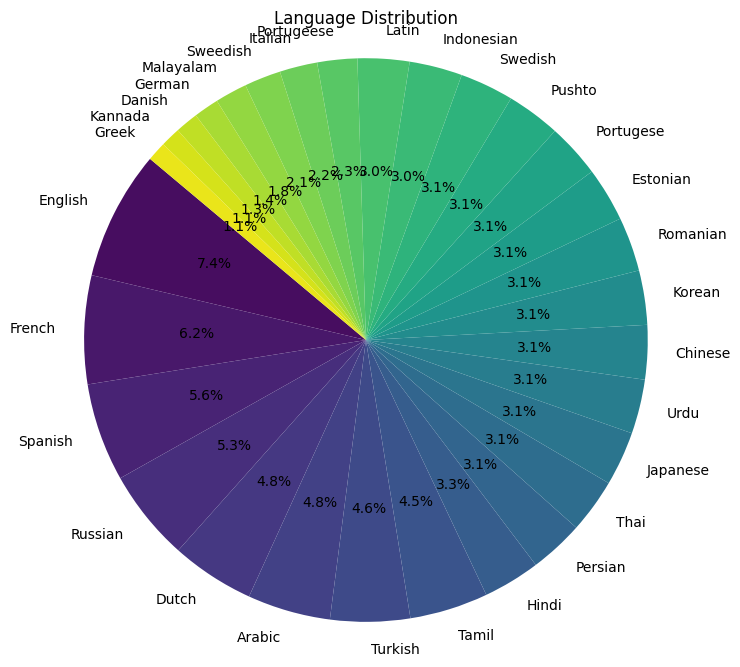

In [21]:
# Pie Chart for Language Distribution
plt.figure(figsize=(8, 8))
plt.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(language_counts)))
plt.title("Language Distribution")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

<ipython-input-22-5cd9f3b4e74f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


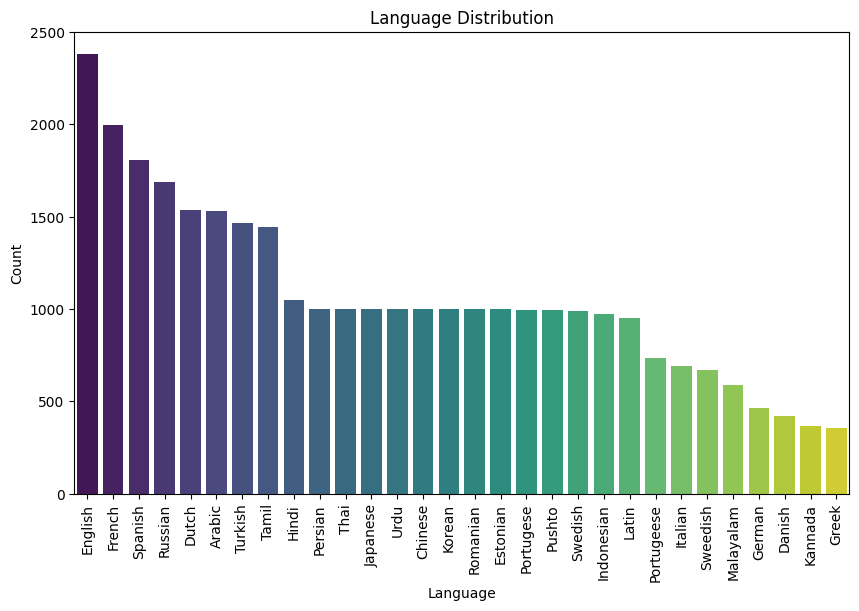

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Word Count in Text

In [23]:
# Word Count in Text
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
print("\nWord Count Statistics:")
print(df['word_count'].describe())


Word Count Statistics:
count    32124.000000
mean        42.142541
std         43.808051
min          0.000000
25%         16.000000
50%         30.000000
75%         54.000000
max       1765.000000
Name: word_count, dtype: float64


In [24]:
df['word_count'].info()

<class 'pandas.core.series.Series'>
Index: 32124 entries, 0 to 32335
Series name: word_count
Non-Null Count  Dtype
--------------  -----
32124 non-null  int64
dtypes: int64(1)
memory usage: 501.9 KB


In [25]:
df['word_count'].head(10)

0     43
1     26
2     14
3     28
4     28
5      1
6     21
7     24
8    117
9      1
Name: word_count, dtype: int64

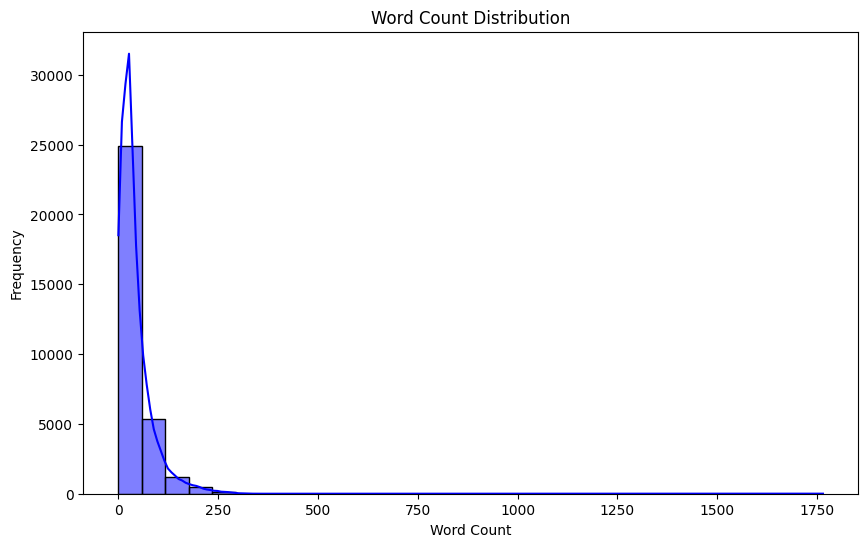

In [26]:
# Visualize Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

## Character Count in Text

In [27]:
# Character Count in Text
df['char_count'] = df['Text'].apply(lambda x: len(str(x)))
print("\nCharacter Count Statistics:")
print(df['char_count'].describe())


Character Count Statistics:
count    32124.000000
mean       263.436745
std        228.559029
min          0.000000
25%        130.000000
50%        197.000000
75%        332.000000
max       5656.000000
Name: char_count, dtype: float64


<ipython-input-28-7766da0b5a60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Language', y='char_count', data=df, palette="Set2")


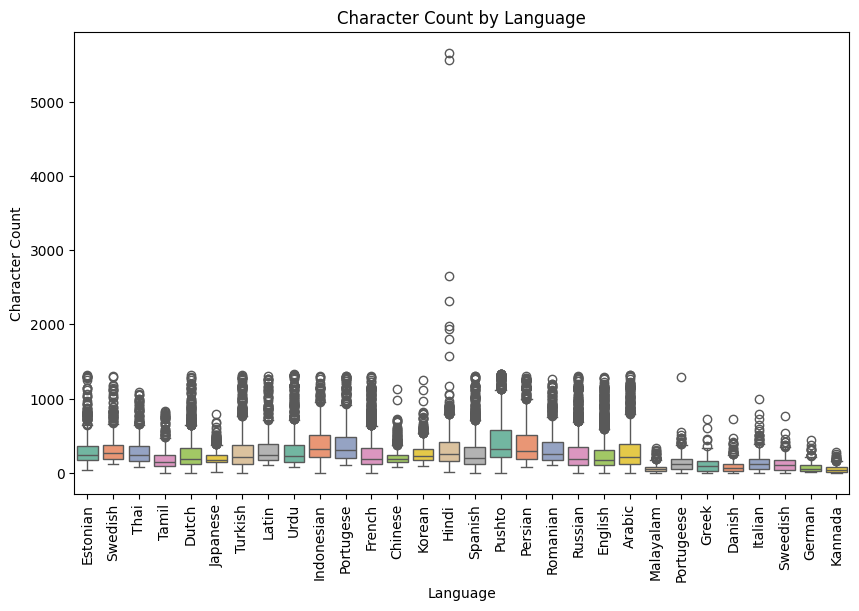

In [28]:
# Visualize Character Count by Language
plt.figure(figsize=(10, 6))
sns.boxplot(x='Language', y='char_count', data=df, palette="Set2")
plt.title("Character Count by Language")
plt.xlabel("Language")
plt.ylabel("Character Count")
plt.xticks(rotation=90)
plt.show()

## Correlation Analysis for Word Count and Character Count

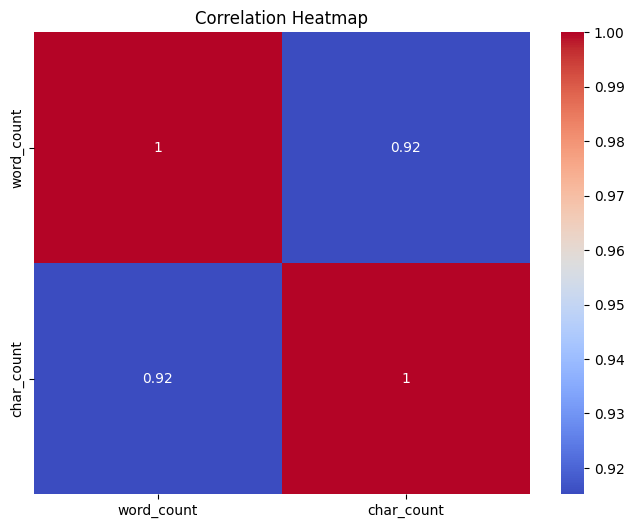

In [29]:
# Correlation Analysis for Word Count and Character Count
plt.figure(figsize=(8, 6))
sns.heatmap(df[['word_count', 'char_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Label Encoding

Label Encoding is the process of converting categorical data (e.g., text labels) into numerical values, making it suitable for machine learning models.

In [30]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'language' column
df['language_encoded'] = label_encoder.fit_transform(df['Language'])

# Display the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

# Display the first few rows with the encoded column
print(df[['Language', 'language_encoded']].head(20))

Label Encoding Mapping: {'Arabic': 0, 'Chinese': 1, 'Danish': 2, 'Dutch': 3, 'English': 4, 'Estonian': 5, 'French': 6, 'German': 7, 'Greek': 8, 'Hindi': 9, 'Indonesian': 10, 'Italian': 11, 'Japanese': 12, 'Kannada': 13, 'Korean': 14, 'Latin': 15, 'Malayalam': 16, 'Persian': 17, 'Portugeese': 18, 'Portugese': 19, 'Pushto': 20, 'Romanian': 21, 'Russian': 22, 'Spanish': 23, 'Swedish': 24, 'Sweedish': 25, 'Tamil': 26, 'Thai': 27, 'Turkish': 28, 'Urdu': 29}
      Language  language_encoded
0     Estonian                 5
1      Swedish                24
2         Thai                27
3        Tamil                26
4        Dutch                 3
5     Japanese                12
6      Turkish                28
7        Latin                15
8         Urdu                29
9     Japanese                12
10  Indonesian                10
11   Portugese                19
12      French                 6
13     Chinese                 1
14      Korean                14
15        Thai 

# Train-test split

Features and Labels:

* X: Feature data from the Text column.
* y: Target labels from the language_encoded column.

Train-Test Split:

* test_size=0.2: Reserves 20% of the data for testing, 80% for training.
* random_state=42: Ensures reproducibility.

The print statements display the number of samples in the training and test sets.

In [31]:
from sklearn.model_selection import train_test_split

# Prepare features and labels
X = df['Text'].values
y = df['language_encoded'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 25699
Test set size: 6425


# Tokenizer, sequence and padding

Tokenization:
* Initializes a Tokenizer with a vocabulary size of 10,000 and an <OOV> token for out-of-vocabulary words.
* fit_on_texts(X_train): Builds a word-to-index mapping based on training data.

Convert Text to Sequences:
* exts_to_sequences: Converts each text into a list of integers using the word index.
* X_train_seq and X_test_seq: Sequences for train and test data.

Pad Sequences:
* Pads/truncates sequences to a fixed max_length=100:
  * padding='post': Adds padding at the end of sequences.
  * truncating='post': Truncates longer sequences at the end.
* Outputs X_train_padded and X_test_padded as uniform-length arrays.
Print Outputs:

Displays sample train/test sequences and their padded versions.

## Tokenizer

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize text
vocab_size = 30000  # Adjust based on your dataset
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

print("word index:", tokenizer.word_index)

word index: {'<OOV>': 1, 'de': 2, 'क': 3, 'a': 4, 'the': 5, 'en': 6, 'la': 7, 'in': 8, 'د': 9, 'ह': 10, 'په': 11, 'of': 12, 'و': 13, 'म': 14, 'et': 15, 'que': 16, 'i': 17, 'در': 18, 'and': 19, 'او': 20, 'o': 21, 'في': 22, 'в': 23, 'e': 24, 'le': 25, 'به': 26, 'är': 27, 'el': 28, 'un': 29, 'to': 30, 'y': 31, 'کے': 32, 'من': 33, 'van': 34, 'se': 35, 'از': 36, 'и': 37, 'میں': 38, 'on': 39, 'à': 40, 'est': 41, 'is': 42, 'और': 43, 'کی': 44, 'het': 45, 've': 46, 'کې': 47, 'och': 48, 'ہے': 49, 'di': 50, 'da': 51, 'स': 52, 'du': 53, 'în': 54, 'اور': 55, 'dan': 56, 'که': 57, 'den': 58, 'por': 59, 'een': 60, 'yang': 61, 'چې': 62, 'em': 63, 'les': 64, 'des': 65, 'was': 66, 'para': 67, 'as': 68, 'سے': 69, 'ja': 70, 'no': 71, 'do': 72, 'și': 73, 'los': 74, 'del': 75, 'این': 76, 'له': 77, 'کا': 78, 'एक': 79, 'على': 80, 'bir': 81, 'for': 82, 'av': 83, 'med': 84, 'थ': 85, 'را': 86, 'است': 87, 'на': 88, 'din': 89, 'पर': 90, 'som': 91, 'al': 92, 'una': 93, 'اس': 94, 'پر': 95, 'como': 96, 'wikipedia': 97

## sequences

In [33]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Print the train and test sequences
print("Train sequences:", X_train_seq[:5])
print("Test sequences:", X_test_seq[:5])


Train sequences: [[4641, 1, 1, 1, 1, 1, 1, 1, 1, 7894, 1, 1, 1, 1, 1, 1, 17476, 11096, 1, 1, 1, 1, 1, 1, 2143, 1138, 1, 1, 1, 1, 1, 1, 1488, 17477, 1, 1, 6911, 1, 1, 1, 1, 1, 1, 1638, 4417, 1, 1, 1, 10117, 8545, 1, 1, 29873, 177, 1, 1, 1, 1, 2070, 3714, 17476, 1, 2284, 1, 1, 1, 1, 9287, 10118, 1, 1, 6047, 177, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4418, 4642, 1, 1, 11097, 1, 1, 1, 1, 24265, 1, 727, 930, 1, 780, 10119, 1, 1, 3715, 1, 8545, 1, 3716, 1, 1638, 4417, 1, 177, 1, 17478, 1, 1, 1, 1, 1, 1, 1, 11098, 3714, 1, 1, 1, 24266], [64, 1, 1, 338, 987, 1, 40, 3307, 24267, 65, 24268, 2497, 6, 3877, 12215, 15, 6, 3877, 2013, 169, 187, 338, 64, 24269, 127, 338, 64, 230, 1, 213, 65, 2498, 2, 7, 632, 2497, 6, 11099, 15, 6, 360, 64, 1, 338, 1, 13618, 40, 7371, 40, 65, 24268, 2, 7, 632, 6, 3081, 11099, 15, 6, 360, 64, 1, 15, 1, 1, 338, 6, 24270, 1, 40, 3307, 213, 29, 9288, 2, 2497, 6, 3877, 6, 360, 15, 6, 3877, 12215, 64, 1, 338, 7371, 1031, 8546, 1, 7895, 7, 9289, 2, 12216, 12217], [788, 10120, 338, 1

## padding

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Pad sequences
max_length = 100  # Adjust based on text length distribution
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

print("text train padding:", X_train_padded)
print("text test padding:", X_test_padded)

text train padding: [[ 4641     1     1 ...   780 10119     1]
 [   64     1     1 ...     0     0     0]
 [  788 10120   338 ...     0     0     0]
 ...
 [    1 15269 17380 ...     0     0     0]
 [    1   690  1606 ...     0     0     0]
 [    1     1  2012 ...     0     0     0]]
text test padding: [[ 1704  5524     1 ...     0     0     0]
 [    1     1 13067 ...     0     0     0]
 [    1   216  1556 ...     0     0     0]
 ...
 [    1     1     1 ...     0     0     0]
 [    1   520  3878 ...     0     0     0]
 [    1     1     1 ...     0     0     0]]


# model creation

## Prediction function

In [36]:
import numpy as np

def predict_language(input_text, model, tokenizer, label_encoder, max_length=100):
    """
    Predict the language of the given input text.

    Parameters:
        input_text (str): The text to classify.
        model (tf.keras.Model): The trained model.
        tokenizer (Tokenizer): The tokenizer used during training.
        label_encoder (LabelEncoder): The label encoder used for encoding classes.
        max_length (int): The maximum length for padding sequences.

    Returns:
        str: Predicted language label.
    """
    # Preprocess the input text
    input_sequence = tokenizer.texts_to_sequences([input_text])  # Tokenize the text
    input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post', truncating='post')  # Pad the sequence

    # Predict the language
    predictions = model.predict(input_padded)  # Model prediction
    predicted_class = np.argmax(predictions, axis=1)  # Get the class with the highest probability

    # Decode the predicted class
    predicted_label = label_encoder.inverse_transform(predicted_class)
    return predicted_label[0]


In [37]:
languages_dict = {
    "English": "Hello and welcome to the text classifier! This tool is designed to help you analyze and categorize text into different languages or topics with ease and accuracy. We hope you find it useful and enjoyable!",
    "French": "Bonjour et bienvenue dans le classificateur de texte ! Cet outil est conçu pour vous aider à analyser et à classer les textes dans différentes langues ou sujets avec simplicité et précision. Nous espérons que vous le trouverez utile et agréable !",
    "Spanish": "¡Hola y bienvenido al clasificador de texto! Esta herramienta está diseñada para ayudarte a analizar y categorizar texto en diferentes idiomas o temas con facilidad y precisión. ¡Esperamos que te sea útil y agradable!",
    "Russian": "Здравствуйте и добро пожаловать в классификатор текста! Этот инструмент создан для того, чтобы помочь вам анализировать и классифицировать текст на разные языки или темы легко и точно. Надеемся, вам понравится его использовать!",
    "Dutch": "Hallo en welkom bij de tekstclassifier! Deze tool is ontworpen om je te helpen tekst eenvoudig en nauwkeurig te analyseren en in verschillende talen of onderwerpen te classificeren. We hopen dat je het nuttig en prettig vindt!",
    "Arabic": "مرحبًا وأهلاً بك في مصنف النصوص! تم تصميم هذه الأداة لمساعدتك على تحليل النصوص وتصنيفها إلى لغات أو موضوعات مختلفة بسهولة ودقة. نأمل أن تجدها مفيدة وممتعة!",
    "Turkish": "Merhaba ve metin sınıflandırıcısına hoş geldiniz! Bu araç, metinleri kolayca ve doğru bir şekilde analiz etmenize ve farklı dillere veya konulara sınıflandırmanıza yardımcı olmak için tasarlanmıştır. Umarız faydalı ve keyifli bulursunuz!",
    "Tamil": "வணக்கம், உரை வகைப்பாட்டிக்கு வரவேற்கிறோம்! இந்த கருவி உங்களுக்கு உரையை எளிதாகவும் துல்லியமாகவும் வகைப்படுத்த மற்றும் பகுப்பாய்வு செய்ய உதவும் வகையில் வடிவமைக்கப்பட்டுள்ளது. இதை நீங்கள் பயனுள்ளதாகவும் மகிழ்ச்சியுடனும் பார்க்கிறீர்கள் என்று நம்புகிறோம்!",
    "Hindi": "नमस्ते, पाठ वर्गीकरणकर्ता में आपका स्वागत है! यह उपकरण आपको आसानी और सटीकता के साथ पाठ का विश्लेषण और वर्गीकरण करने में मदद करने के लिए डिज़ाइन किया गया है। हमें उम्मीद है कि आप इसे उपयोगी और आनंददायक पाएंगे!",
    "Persian": "سلام و به دسته‌بندی‌کننده متن خوش آمدید! این ابزار برای کمک به شما در تحلیل و طبقه‌بندی متن به زبان‌ها یا موضوعات مختلف با سهولت و دقت طراحی شده است. امیدواریم که برای شما مفید و لذت‌بخش باشد!",
    "Thai": "สวัสดีและยินดีต้อนรับสู่ตัวจัดหมวดหมู่ข้อความ! เครื่องมือนี้ได้รับการออกแบบมาเพื่อช่วยให้คุณวิเคราะห์และจัดประเภทข้อความเป็นภาษาหรือหัวข้อต่าง ๆ ได้อย่างง่ายดายและแม่นยำ เราหวังว่าคุณจะพบว่ามีประโยชน์และสนุกสนาน!",
    "Japanese": "こんにちは、テキスト分類器へようこそ！このツールは、テキストを簡単かつ正確に分析し、さまざまな言語やトピックに分類するお手伝いをするために設計されています。ぜひお楽しみください！",
    "Urdu": "ہیلو، متن کے درجہ بندی میں خوش آمدید! یہ ٹول آپ کو متن کو مختلف زبانوں یا موضوعات میں آسانی اور درستگی کے ساتھ تجزیہ اور درجہ بندی کرنے میں مدد دینے کے لیے ڈیزائن کیا گیا ہے۔ ہم امید کرتے ہیں کہ آپ اسے مفید اور لطف اندوز پائیں گے!",
    "Chinese": "你好，欢迎使用文本分类器！此工具旨在帮助您轻松、准确地分析和分类文本为不同的语言或主题。希望您觉得它既有用又愉快！",
    "Korean": "안녕하세요, 텍스트 분류기에 오신 것을 환영합니다! 이 도구는 텍스트를 쉽게 분석하고 다양한 언어 또는 주제로 분류할 수 있도록 설계되었습니다. 유용하고 즐거운 도구가 되길 바랍니다!",
    "Romanian": "Bună și bine ai venit la clasificatorul de text! Acest instrument este conceput pentru a te ajuta să analizezi și să clasifici textele în diferite limbi sau subiecte cu ușurință și precizie. Sperăm să-ți fie util și plăcut!",
    "Estonian": "Tere ja tere tulemast tekstiklassifikaatorisse! See tööriist on loodud selleks, et aidata teil teksti hõlpsalt ja täpselt analüüsida ning liigitada erinevatesse keeltesse või teemadesse. Loodame, et see on teile kasulik ja nauditav!",
    "Portuguese": "Olá e bem-vindo ao classificador de texto! Esta ferramenta foi projetada para ajudá-lo a analisar e categorizar textos em diferentes idiomas ou tópicos com facilidade e precisão. Esperamos que você a ache útil e agradável!",
    "Pushto": "سلام، د متن کټګورۍ ته ښه راغلاست! دا وسیله ستاسو لپاره په اسانۍ او دقت سره د متن تحلیل او طبقه بندي کولو لپاره ډیزاین شوې ده. هیله لرو چې ګټوره او خوندوره وي!",
    "Swedish": "Hej och välkommen till textklassificeraren! Det här verktyget är utformat för att hjälpa dig att analysera och klassificera text på olika språk eller ämnen enkelt och exakt. Vi hoppas att du finner det användbart och trevligt!",
    "Indonesian": "Halo dan selamat datang di pengklasifikasi teks! Alat ini dirancang untuk membantu Anda menganalisis dan mengategorikan teks ke dalam berbagai bahasa atau topik dengan mudah dan akurat. Kami harap Anda menemukannya berguna dan menyenangkan!",
    "Latin": "Salve et grata ad textum classifier! Hoc instrumentum destinatum est ut te adiuvet ad textus facile et accurate in varias linguas vel themata digerendas. Speramus utile et iucundum fore!",
    "Italian": "Ciao e benvenuto nel classificatore di testo! Questo strumento è progettato per aiutarti ad analizzare e classificare i testi in diverse lingue o argomenti in modo semplice e accurato. Speriamo che lo trovi utile e piacevole!",
    "Malayalam": "ഹലോ, ടെക്സ്റ്റ് ക്ലാസിഫയറിലേക്ക് സ്വാഗതം! ഈ ഉപകരണം ടെക്സ്റ്റ് വിശകലനം ചെയ്യാനും അതിനെ വിവിധ ഭാഷകളിലേക്കോ വിഷയങ്ങളിലേക്കോ എളുപ്പത്തിൽവും കൃത്യതയോടെയും തരംതിരിക്കാനുമായി രൂപകല്പന ചെയ്തതാണ്. ഇത് നിങ്ങള്ക്ക് പ്രയോജനകരവും രസകരവുമാകുമെന്ന് പ്രതീക്ഷിക്കുന്നു!",
    "German": "Hallo und willkommen beim Textklassifikator! Dieses Tool wurde entwickelt, um Ihnen zu helfen, Texte einfach und präzise zu analysieren und in verschiedene Sprachen oder Themen zu kategorisieren. Wir hoffen, dass Sie es nützlich und angenehm finden!",
    "Danish": "Hej og velkommen til tekstklassifikatoren! Dette værktøj er designet til at hjælpe dig med at analysere og klassificere tekst i forskellige sprog eller emner nemt og præcist. Vi håber, at du finder det nyttigt og behageligt!",
    "Kannada": "ನಮಸ್ಕಾರ, ಪಠ್ಯದ ವರ್ಗೀಕರಕಕ್ಕೆ ಸ್ವಾಗತ! ಈ ಸಾಧನವು ಪಠ್ಯವನ್ನು ಸುಲಭವಾಗಿ ಮತ್ತು ನಿಖರವಾಗಿ ವಿಶ್ಲೇಷಿಸಲು ಮತ್ತು ವಿಭಿನ್ನ ಭಾಷೆಗಳಲ್ಲಿಗೆ ಅಥವಾ ವಿಷಯಗಳಿಗೆ ವರ್ಗೀಕರಿಸಲು ನಿಮಗೆ ಸಹಾಯ ಮಾಡಲು ವಿನ್ಯಾಸಗೊಳಿಸಲಾಗಿದೆ. ಇದು ನಿಮಗೆ ಉಪಯುಕ್ತ ಮತ್ತು ಆನಂದದಾಯಕವಾಗುತ್ತದೆ ಎಂದು ನಾವು ಭಾವಿಸುತ್ತೇವೆ!",
    "Greek": "Γεια σας και καλώς ήρθατε στον ταξινομητή κειμένου! Αυτό το εργαλείο έχει σχεδιαστεί για να σας βοηθήσει να αναλύετε και να ταξινομείτε κείμενα σε διαφορετικές γλώσσες ή θέματα εύκολα και με ακρίβεια. Ελπίζουμε να το βρείτε χρήσιμο και ευχάριστο!"
}


## Model Architecture

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

num_languages = len(language_counts) # Ensure it's the number of unique classes

# Define the model
model = Sequential([
    # Embedding layer: Converts text to dense vector representation
    Embedding(input_dim=30000, output_dim=64, input_length=100),

    # Flatten layer: Flattens the embeddings into a single vector
    Flatten(),

    # Dense layer: Fully connected layer for intermediate processing
    Dense(32, activation='relu'),

    # Output layer: Predicts the language (num_languages = number of unique classes)
    Dense(num_languages, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4553 - loss: 2.0168 - val_accuracy: 0.8965 - val_loss: 0.3980
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9288 - loss: 0.2580 - val_accuracy: 0.9225 - val_loss: 0.2642
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9490 - loss: 0.1645 - val_accuracy: 0.9240 - val_loss: 0.2423
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9536 - loss: 0.1273 - val_accuracy: 0.9248 - val_loss: 0.2573
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9603 - loss: 0.1094 - val_accuracy: 0.9228 - val_loss: 0.2613
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9596 - loss: 0.1096 - val_accuracy: 0.9192 - val_loss: 0.2656
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9621 - loss: 0.1027 - val_accuracy: 0.9203 - val_loss: 0.2705
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9622 - loss: 0.1070 - 

In [40]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 64)             │       1,920,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         204,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,377,468 (24.33 MB)

 Trainable params: 2,125,822 (8.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,251,646 (16.22 MB)

In [41]:
for lang in languages_dict:
  custom_text = languages_dict[lang]  # Replace with your custom input
  predicted_language = predict_language(custom_text, model, tokenizer, label_encoder)
  print(f"The predicted language is: {predicted_language} correct: {lang}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The predicted language is: English correct: English
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted language is: French correct: French
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted language is: Spanish correct: Spanish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted language is: Russian correct: Russian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The predicted language is: Dutch correct: Dutch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The predicted language is: Arabic correct: Arabic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The predicted language is: Turkish correct: Turkish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The predicted language is: Thai correct: Tamil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The predicted language is: Thai correct: Hindi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted language is: Persian correct: Persian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted language is: Thai correct: Thai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/s

## NLP

In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode labels into integers
num_languages = len(set(y_train))   # Number of unique languages

# Step 2: Tokenize and pad the sequences (texts)
vocab_size = 50000  # Vocabulary size
max_length = 20  # Max sequence length (adjustable)
# Step 4: Build the model
nlp_model = Sequential([
    # Embedding layer: Converts words into dense vectors
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),

    # Flatten layer: Flattens the 2D output of Embedding layer into a 1D vector
    Flatten(),

    # Fully connected layer: Adds non-linearity
    Dense(32, activation='relu'),

    # Dropout layer: Helps to reduce overfitting
    Dropout(0.2),

    # Output layer: softmax activation for multi-class classification
    Dense(num_languages, activation='softmax')
])

# Step 5: Compile the model
nlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = nlp_model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=2)

# Step 7: Evaluate the model
loss, accuracy = nlp_model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12850/12850 ━━━━━━━━━━━━━━━━━━━━ 446s 35ms/step - accuracy: 0.6319 - loss: 1.3316 - val_accuracy: 0.9124 - val_loss: 0.2863
Epoch 2/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 490s 34ms/step - accuracy: 0.9212 - loss: 0.2411 - val_accuracy: 0.9144 - val_loss: 0.2929
Epoch 3/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 445s 34ms/step - accuracy: 0.9358 - loss: 0.1924 - val_accuracy: 0.9206 - val_loss: 0.3112
Epoch 4/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 447s 35ms/step - accuracy: 0.9463 - loss: 0.1633 - val_accuracy: 0.9191 - val_loss: 0.3410
Epoch 5/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 503s 35ms/step - accuracy: 0.9465 - loss: 0.1528 - val_accuracy: 0.9177 - val_loss: 0.4107
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9173 - loss: 0.4111
Test Loss: 0.4107, Test Accuracy: 0.9177


In [43]:
for lang in languages_dict:
  custom_text = languages_dict[lang]  # Replace with your custom input
  predicted_language = predict_language(custom_text, nlp_model, tokenizer, label_encoder)
  print(f"The predicted language is: {predicted_language} correct: {lang}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The predicted language is: English correct: English
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted language is: French correct: French
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The predicted language is: Spanish correct: Spanish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The predicted language is: Russian correct: Russian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
The predicted language is: Dutch correct: Dutch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted language is: Arabic correct: Arabic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The predicted language is: Turkish correct: Turkish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted language is: Thai correct: Tamil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The predicted language is: Latin correct: Hindi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted language is: Persian correct: Persian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The predicted language is: Thai correct: Thai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/

## GRU

In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode labels into integers
num_languages = len(language_counts)   # Number of unique languages

# Step 2: Tokenize and pad the sequences (texts)
vocab_size = 30000  # Vocabulary size
max_length = 20  # Max sequence length (adjustable)

# Step 4: Build the model with GRU
gru_model = Sequential([
    # Embedding layer: Converts words into dense vectors
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),

    # GRU layer: Captures sequential dependencies
    GRU(64, activation='tanh', return_sequences=False),  # 64 units, no return_sequences for final output

    # Dropout layer: Helps to reduce overfitting
    Dropout(0.2),

    # Fully connected layer: Adds non-linearity
    Dense(32, activation='relu'),

    # Output layer: softmax activation for multi-class classification
    Dense(num_languages, activation='softmax')
])

# Step 5: Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = gru_model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=2)

# Step 7: Evaluate the model
loss, accuracy = gru_model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12850/12850 ━━━━━━━━━━━━━━━━━━━━ 928s 72ms/step - accuracy: 0.3198 - loss: 2.3932 - val_accuracy: 0.9049 - val_loss: 0.3243
Epoch 2/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 975s 71ms/step - accuracy: 0.9217 - loss: 0.2662 - val_accuracy: 0.9183 - val_loss: 0.2664
Epoch 3/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 914s 71ms/step - accuracy: 0.9455 - loss: 0.1671 - val_accuracy: 0.9240 - val_loss: 0.2818
Epoch 4/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 918s 71ms/step - accuracy: 0.9545 - loss: 0.1247 - val_accuracy: 0.9268 - val_loss: 0.3037
Epoch 5/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 946s 73ms/step - accuracy: 0.9568 - loss: 0.1219 - val_accuracy: 0.9279 - val_loss: 0.3592
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9312 - loss: 0.3530
Test Loss: 0.3592, Test Accuracy: 0.9279


In [45]:
for lang in languages_dict:
  custom_text = languages_dict[lang]  # Replace with your custom input
  predicted_language = predict_language(custom_text, gru_model, tokenizer, label_encoder)
  print(f"The predicted language is: {predicted_language} correct: {lang}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
The predicted language is: English correct: English
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The predicted language is: French correct: French
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
The predicted language is: Spanish correct: Spanish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
The predicted language is: Russian correct: Russian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The predicted language is: Dutch correct: Dutch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
The predicted language is: Arabic correct: Arabic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
The predicted language is: Turkish correct: Turkish
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
The predicted language is: Thai correct: Tamil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
The predicted language is: Hindi correct: Hindi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
The predicted language is: Persian correct: Persian
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The predicted language is: Thai correct: Thai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

## saving model, tokenizer and label_encoder:

In [46]:
# Save the trained model
model.save('MD.h5')
nlp_model.save('nlp.h5')
gru_model.save('gru.h5')

# Save the tokenizer using pickle
import joblib

joblib.dump(tokenizer, 'tokenizer.joblib')

joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']